In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

read image

In [33]:
img1 = cv2.imread('noisy_lena.png', 0)
x, y = img1.shape

mask 3x3

In [34]:
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

Convolve untuk first pass menggunakan averaging filter

In [35]:
img2 = np.zeros([x, y])

for i in range(1, x-1):
    for j in range(1, y-1):
        temp = img1[i-1, j-1] * mask[0, 0] + img1[i-1, j] * mask[0, 1] + img1[i-1, j+1] * mask[0, 2] + img1[i, j-1] * mask[1, 0] + img1[i, j] * mask[1, 1] + img1[i, j+1] * mask[1, 2] + img1[i+1, j-1] * mask[2, 0] + img1[i+1, j] * mask[2, 1] + img1[i+1, j+1] * mask[2, 2]

        img2[i, j] = temp


Dilakukan pass ke-2

In [36]:
img3 = np.zeros([x, y])

for i in range(1, x-1):
    for j in range(1, y-1):
        temp = img2[i-1, j-1] * mask[0, 0] + img2[i-1, j] * mask[0, 1] + img2[i-1, j+1] * mask[0, 2] + img2[i, j-1] * mask[1, 0] + img2[i, j] * mask[1, 1] + img2[i, j+1] * mask[1, 2] + img2[i+1, j-1] * mask[2, 0] + img2[i+1, j] * mask[2, 1] + img2[i+1, j+1] * mask[2, 2]

        img3[i, j] = temp


Melakukan selisih dari pass 1 dengan pass 2

In [30]:
img4 = np.zeros([x, y])

for i in range(1, x-1):
    for j in range(1, y-1):
        img4[i, j] = img2[i, j] - img3[i, j]


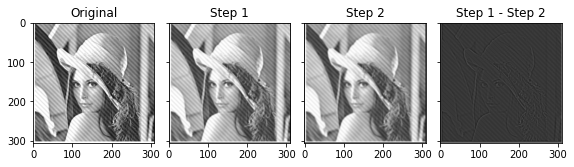

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (8, 3), sharex = True, sharey = True)

ax1.imshow(img1, 'gray')
ax1.set_title('Original')
ax2.imshow(img2, 'gray')
ax2.set_title('Step 1')
ax3.imshow(img3, 'gray')
ax3.set_title('Step 2')
ax4.imshow(img4, 'gray')
ax4.set_title('Step 1 - Step 2')

plt.tight_layout()
plt.show()